# Tutorial to linear regression

## Import needed libraries

In [70]:
from sklearn.model_selection import train_test_split
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = [14.0, 10.0]
%matplotlib inline

In [2]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K

# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.
/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Generate artificial toy-data

In [3]:
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1, noise=5)

#### Split the data into train and test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Visualise data to make a sanity check

Text(0,0.5,'Target y')

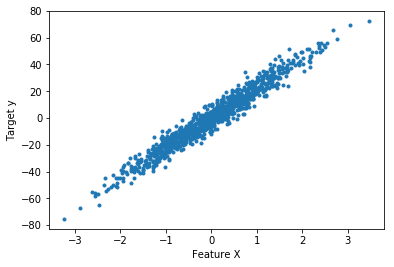

In [7]:
pylab.plot(X, y, '.')
pylab.xlabel('Feature X')
pylab.ylabel('Target y')

## Define model for linear regression

In [19]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile model: Builds a graph and initializes weights etc
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train the model

### Lets train one epoch at time

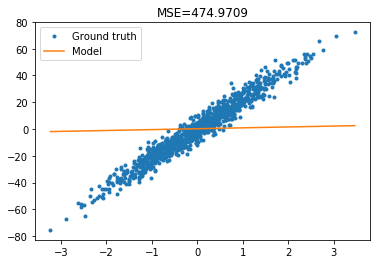

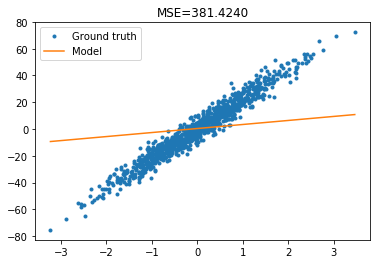

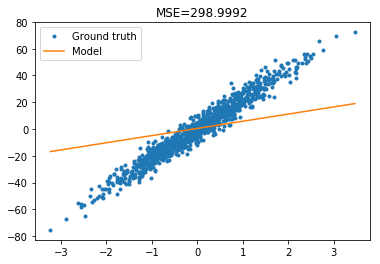

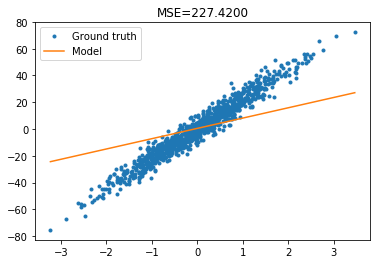

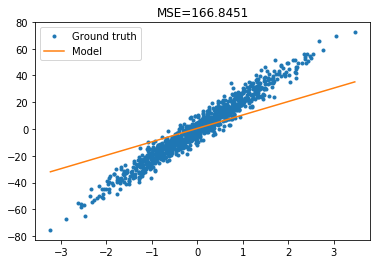

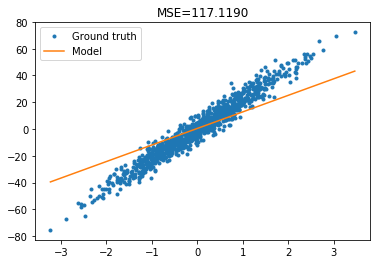

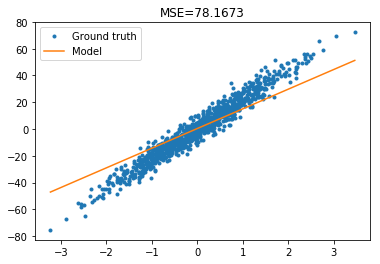

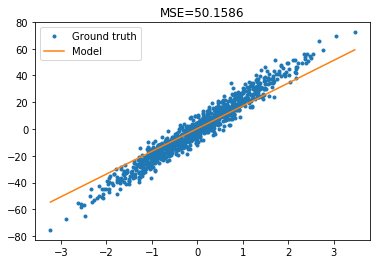

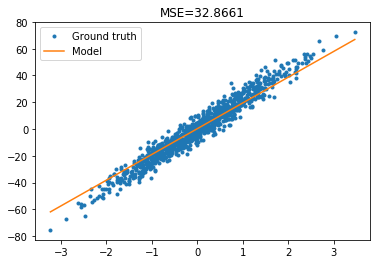

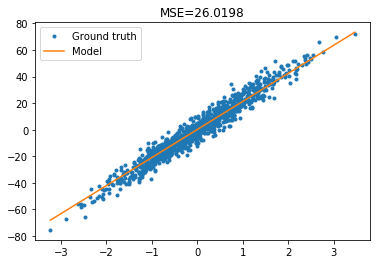

In [22]:
for i in range(0, 10):
    history = model.fit(x_train, y_train,
                        batch_size=16,
                        epochs=50,
                        verbose=0)
    mse = model.evaluate(x_train, y_train, verbose=0)
    #print(mse)
    
    pylab.figure()
    pylab.clf()
    xs = np.linspace(X.min(), X.max(), 100)

    pylab.plot(X, y, '.')
    pylab.plot(xs, model.predict(xs))
    pylab.legend(['Ground truth', 'Model'])

    pylab.title('MSE=%3.4f' % mse)

## Evaluate the model

In [74]:
model.evaluate(x_test, y_test, verbose=0)

26.390926208496094